This notebook shows how BigBang can help you explore a mailing list archive.

First, use this IPython magic to tell the notebook to display matplotlib graphics inline. This is a nice way to display results.

Import the BigBang modules as needed. These should be in your Python environment if you've installed BigBang correctly.

In [1]:
import bigbang.ingress.mailman as mailman
import bigbang.analysis.graph as graph
import bigbang.analysis.process as process
from bigbang.parse import get_date

# from bigbang.functions import *
from bigbang.archive import Archive

/home/sb/projects/bigbang-multi/bigbang/config/config.py:8: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dictionary = yaml.load(stream)


Also, let's import a number of other dependencies we'll use later.

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math
import pytz
import pickle
import os

Now let's load the data for analysis.

In [3]:
urls = ["ipython-dev"]

archives = [Archive(url, mbox=True) for url in urls]

activities = [arx.get_activity(resolved=False) for arx in archives]

/home/sb/projects/bigbang-multi/bigbang/bigbang/mailman.py:157: UserWarning: No mailing list name found at ipython-dev
  warnings.warn("No mailing list name found at %s" % url)


In [4]:
archives[0].data

,From,Subject,Date,In-Reply-To,References,Body
Message-ID,,,,,,
<3E9DE124.8080309@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] Mailing lists indexed at gmane,2003-04-16 23:03:00+00:00,None,None,"Hi all,\n\nafter a suggestion by Jacek Generow..."
<3E9E4094.7030802@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] Re: Refactoring of bdist_wininst...,2003-04-17 05:50:12+00:00,<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,<003d01c28a9a$3dcb8560$e301340a@cyberhigh.fcoe...,"Hi Cory,\n\n> Done. install command will now ..."
<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe.k12.ca.us>,cdodt at fcoe.k12.ca.us (Cory Dodt),[IPython-dev] RE: Refactoring of bdist_wininst...,2003-04-17 14:32:56+00:00,<3E9E4094.7030802@colorado.edu>,None,Distutils 1.0.3 is not included with Python 2....
<3E9EC1CA.3060800@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] RE: Refactoring of bdist_wininst...,2003-04-17 15:01:30+00:00,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,<000c01c304ee$3cb79e60$e901340a@cyberhigh.fcoe...,Cory Dodt wrote:\n> Distutils 1.0.3 is not inc...
<3E9EF5E3.8080100@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] [Fwd: [ANN] A new IPython is out...,2003-04-17 18:43:47+00:00,None,None,"Hi all,\n\nI've just put out a new pre-release..."
<3E9EFC95.7040309@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] ToDo for 0.4.0,2003-04-17 19:12:21+00:00,None,None,"Hi all,\n\nI'd like to put out a list of thing..."
<3E9F3B79.7070005@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] New bug tracker for IPython,2003-04-17 23:40:41+00:00,None,None,"Hi all,\n\nI just wanted to let you know that,..."
<3E9F3D9B.8040807@colorado.edu>,fperez at colorado.edu (Fernando Perez),[IPython-dev] Re: iPython on Windows,2003-04-17 23:49:47+00:00,<GCEDKONBLEFPPADDJCOECEOIIPAA.whisper@oz.net>,<GCEDKONBLEFPPADDJCOECEOIIPAA.whisper@oz.net>,"Hi David,\n\nmy apologies for the long delay i..."
<200304291817.05898.Kasper.Souren@ircam.fr>,Kasper.Souren at ircam.fr (Kasper Souren),[IPython-dev] possible feature request: auto-run,2003-04-29 18:17:05+00:00,None,None,Hi!\n\nI just had a little idea for a new IPyt...


This variable is for the range of days used in computing rolling averages.

In [5]:
window = 100

For each of the mailing lists we are looking at, plot the rolling average of number of emails sent per day.

/home/sb/projects/bigbang-multi/bigbang/bigbang/mailman.py:157: UserWarning: No mailing list name found at ipython-dev
  warnings.warn("No mailing list name found at %s" % url)
/home/sb/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


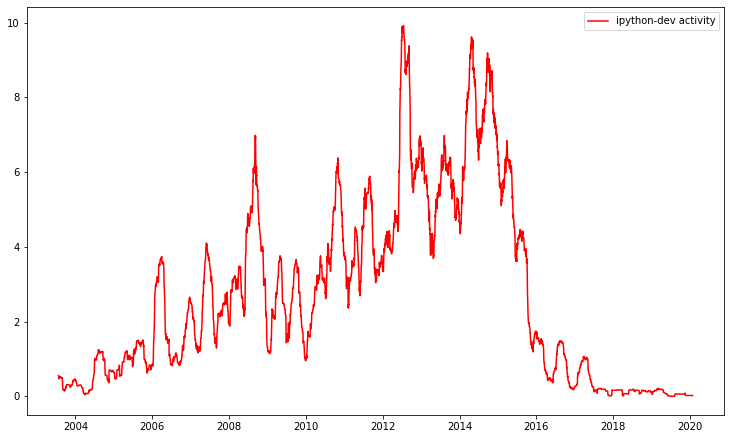

In [6]:
plt.figure(figsize=(12.5, 7.5))

for i, activity in enumerate(activities):
    colors = "rgbkm"

    ta = activity.sum(1)
    rmta = ta.rolling(window).mean()
    rmtadna = rmta.dropna()
    plt.plot_date(
        np.array(rmtadna.index),
        np.array(rmtadna.values),
        colors[i],
        label=mailman.get_list_name(urls[i]) + " activity",
        xdate=True,
    )

    plt.legend()

plt.savefig("activites-marked.png")
plt.show()


Now, let's see: who are the authors of the most messages to one particular list?

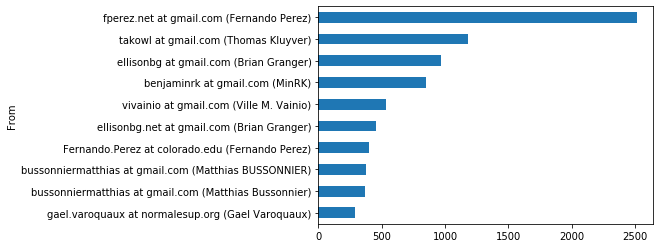

In [7]:
a = activities[0]  # for the first mailing list
ta = a.sum(0)  # sum along the first axis
ta.sort_values(ascending=True)[-10:].plot(kind="barh")

This might be useful for seeing the distribution (does the top message sender dominate?) or for identifying key participants to talk to.

---

Many mailing lists will have some duplicate senders: individuals who use multiple email addresses or are recorded as different senders when using the same email address. We want to identify those potential duplicates in order to get a more accurate representation of the distribution of senders.

To begin with, let's do a naive calculation of the similarity of the From strings, based on the [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance).

This can take a long time for a large matrix, so we will truncate it for purposes of demonstration.

In [8]:
import Levenshtein

distancedf = process.matricize(
    a.columns[:100], process.from_header_distance
)  # calculate the edit distance between the two From titles
df = distancedf.astype(int)  # specify that the values in the matrix are integers

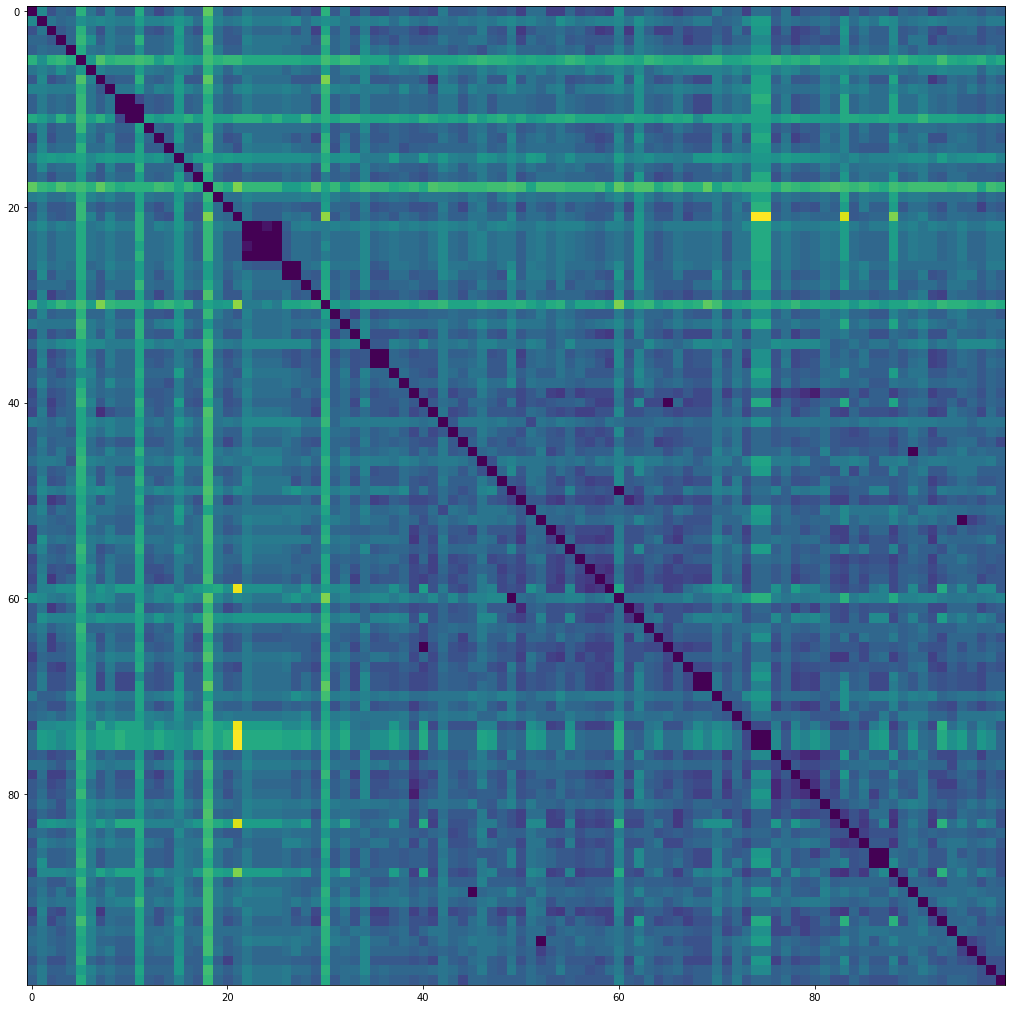

In [9]:
fig = plt.figure(figsize=(18, 18))
plt.imshow(df)
# plt.yticks(np.arange(0.5, len(df.index), 1), df.index) # these lines would show labels, but that gets messy
# plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)

The dark blue diagonal is comparing an entry to itself (we know the distance is zero in that case), but a few other dark blue patches suggest there are duplicates even using this most naive measure.